# Milestone 4 : Linear problems. Regions of absolute stability.

In [ ]:
import matplotlib.pyplot as plt
from numpy import  array, zeros, concatenate, linalg, any, linspace, cos, sin, roots
import math
import Numerical_Schemes
import Simple_Math
import Stability
import Physics


## 1. Integrate the linear oscillator $\ddot{x} + x = 0$ with some initial conditions. Use Euler, Inverse Euler, Leap–Frog, Crank–Nicolson and fourth order RungeKutta method.

In [34]:

U0 = array([1,0])   #Initial conditions

t0 = 0
tf = 500
Np = 100000

t = linspace(t0, tf, Np)

### 1.1. EULER

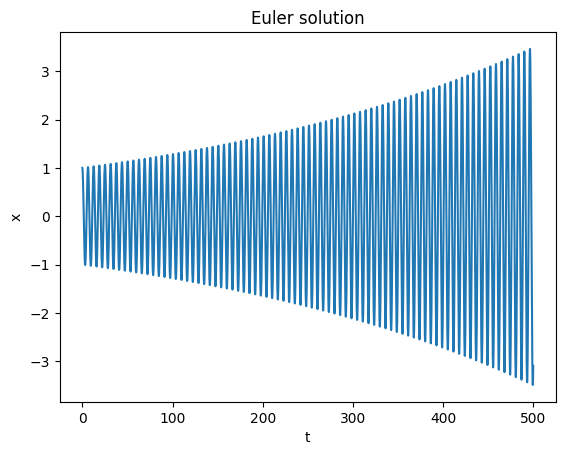

In [35]:
U = Stability.Cauchy_Problem(Physics.LinearOscillator,U0,t,Numerical_Schemes.Euler)   #EULER

plt.plot(t, U[:,0])
plt.xlabel('t')
plt.ylabel('x')
plt.title('Euler solution')
plt.show()

### 1.2. INVERSE EULER

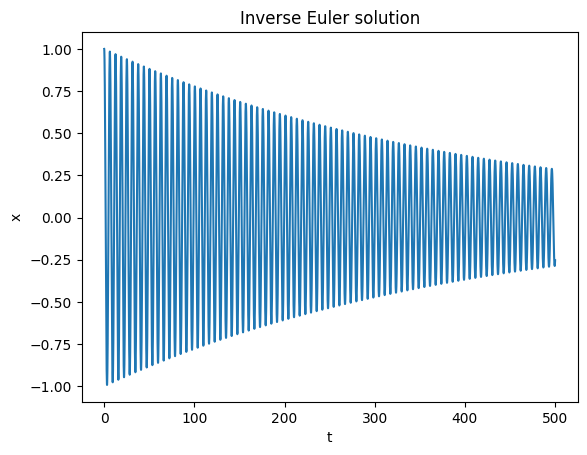

In [30]:
U = Stability.Cauchy_Problem(Physics.LinearOscillator,U0,t,Numerical_Schemes.Inverse_Euler)   #INVERSE EULER


plt.plot(t, U[:,0])
plt.xlabel('t')
plt.ylabel('x')
plt.title('Inverse Euler solution')
plt.show()

### 1.3 LEAP-FROG

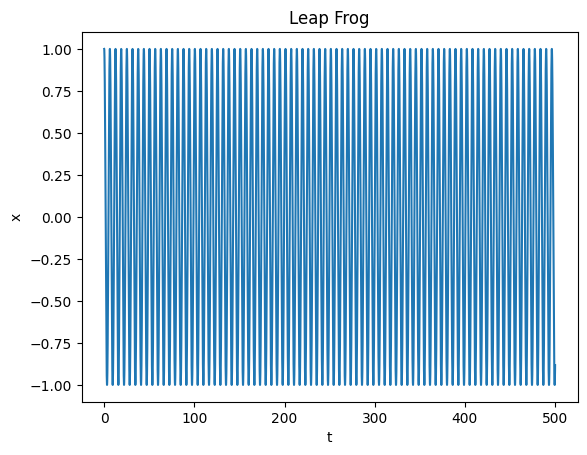

In [31]:
U = Stability.Cauchy_Problem(Physics.LinearOscillator,U0,t,Numerical_Schemes.LeapFrog)   # LEAP FROG4


plt.plot(t, U[:,0])
plt.xlabel('t')
plt.ylabel('x')
plt.title('Leap Frog')
plt.show()

### 1.4 RANGE KUTTA 4

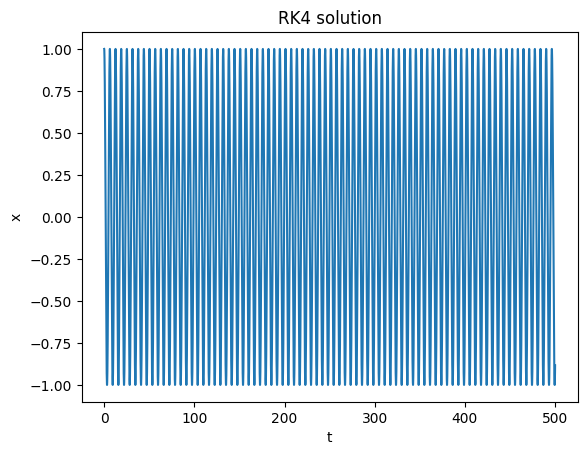

In [36]:
U = Stability.Cauchy_Problem(Physics.LinearOscillator,U0,t,Numerical_Schemes.RangeKutta4)   # 4TH ORDER RANGE KUTTA 4


plt.plot(t, U[:,0])
plt.xlabel('t')
plt.ylabel('x')
plt.title('RK4 solution')
plt.show()

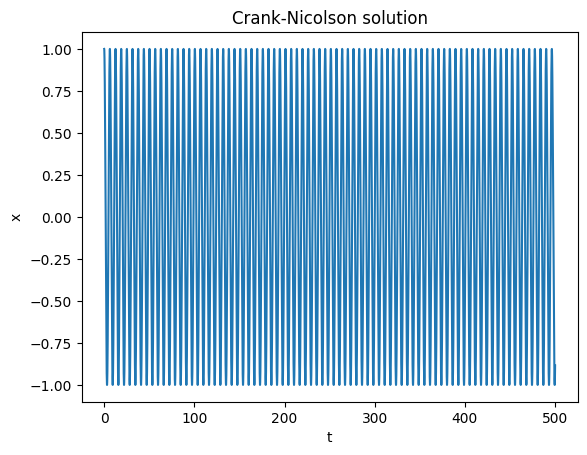

In [37]:
U = Stability.Cauchy_Problem(Physics.LinearOscillator,U0,t,Numerical_Schemes.Crank_Nicolson)   # CRANK NICOLSON

plt.plot(t, U[:,0])
plt.xlabel('t')
plt.ylabel('x')
plt.title('Crank-Nicolson solution')
plt.show()

# 2. Regions of absolute stability of the above methods.


### First of all, it's important to calculate the problem's eigenvalues and the value of $\Delta t$. In this problem the eigenvalues are +i and -i. Once defined the value of $i \Delta t $ and $-i \Delta t$, we need to obtain the stability regions for each scheme, which comes from the characteristic equation: $\\$ 


In [38]:
Eig = array((1j,-1j))
dt = (tf-t0)/Np
Points_x = [Eig.real*dt]
Points_y = [Eig.imag*dt]

### 2.1. Euler:   $\Pi = r - 1 - w$ -->   $ w = r - 1$  $\\$  

Text(0.5, 1.0, 'Stability around eigenvalues: Euler')

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


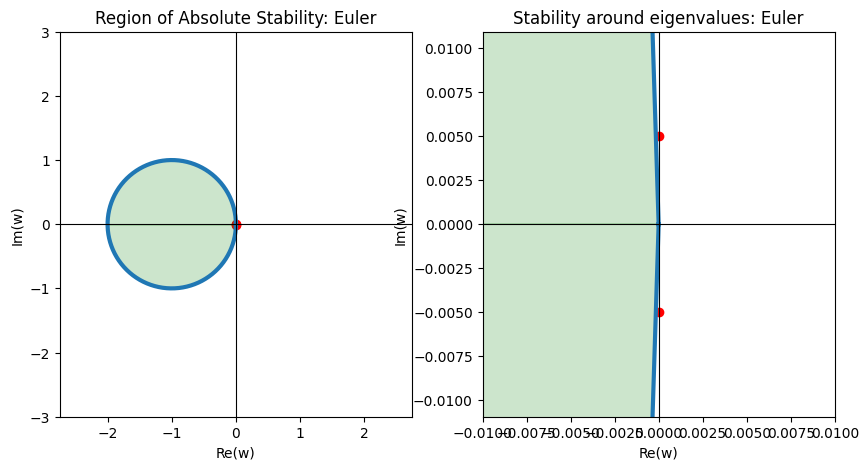

In [39]:
pi = math.pi
Nc = 100

theta = linspace(0, 2*pi, Nc)
r = cos(theta) + 1j * sin(theta)

w = r - 1                                    #Carachteristic equation for Euler


#-------------------------------------------PLOT-----------------------------------------

x = w.real
y = w.imag


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.axis("equal")
plt.plot(x, y, linewidth=3.0)
plt.scatter(Points_x, Points_y,color="red",marker='o')
plt.xlabel('Re(w)')
plt.ylabel('Im(w)')
plt.xlim(-3, 3)
plt.ylim(-3, 3)


plt.fill_between(    #Stable region 
    x, y, 
    where=(x >= -2) & (x <= 0), 
    color='green', 
    alpha=0.2,                  
    label='Región coloreada')


plt.axhline(0, color='black', linestyle='-', linewidth=0.8) 
plt.axvline(0, color='black', linestyle='-', linewidth=0.8) 
plt.title('Region of Absolute Stability: Euler')




plt.subplot(1,2,2)   #-------------------------------------------PLOT2-----------------------------------------
plt.axis("equal")
plt.plot(x, y, linewidth=3.0)
plt.scatter(Points_x, Points_y,color="red",marker='o')
plt.xlabel('Re(w)')
plt.ylabel('Im(w)')
plt.xlim(-2*dt, 2*dt)
plt.ylim(-2*dt, 2*dt)


plt.fill_between(    #Stable region 
    x, y, 
    where=(x >= -2) & (x <= 0), 
    color='green', 
    alpha=0.2,                  
    label='Región coloreada')


plt.axhline(0, color='black', linestyle='-', linewidth=0.8) 
plt.axvline(0, color='black', linestyle='-', linewidth=0.8) 
plt.title('Stability around eigenvalues: Euler')









### 2.2. Reverse Euler:   $\Pi = r - 1 - w$    -->       $ w = \frac{(r - 1)}{r}$  $\\$  

Text(0.5, 1.0, 'Stability around eigenvalues: Reverse Euler')

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


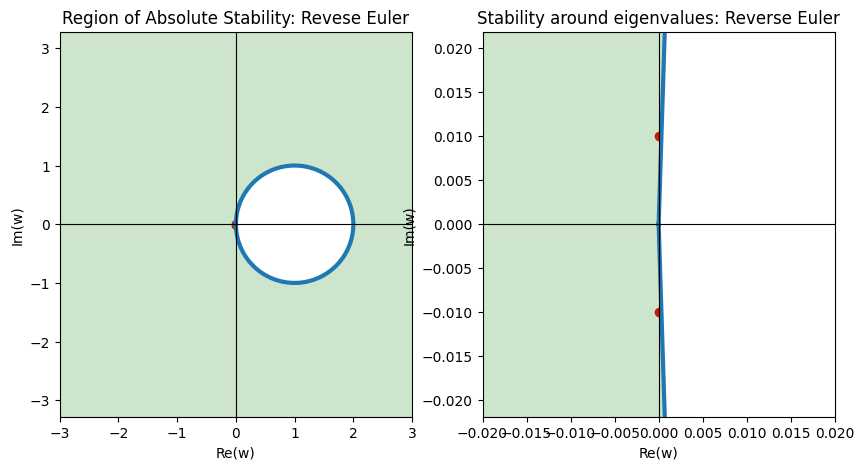

In [12]:
pi = math.pi
Nc = 100

theta = linspace(0, 2*pi, Nc)
r = cos(theta) + 1j * sin(theta)

w = (r-1)/r                                      #Carachteristic equation for REVERSE EULER


#-------------------------------------------PLOT-----------------------------------------

x = w.real
y = w.imag


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.axis("equal")
plt.scatter(Points_x, Points_y,color="red",marker='o')
plt.plot(x, y, linewidth=3.0)
plt.xlabel('Re(w)')
plt.ylabel('Im(w)')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.axvspan(   #Stability region (painted the whole background)
    xmin=-4, 
    xmax=4, 
    color='green', 
    alpha=0.2)

plt.fill_between(    #Unstable region (painted on white OVER the other)
    x, y, 
    where=(x >= 0) & (x <= 2), 
    color='white', 
    alpha=1,                  
    label='Región coloreada')



plt.axhline(0, color='black', linestyle='-', linewidth=0.8) 
plt.axvline(0, color='black', linestyle='-', linewidth=0.8) 
plt.title('Region of Absolute Stability: Revese Euler')

 
plt.subplot(1,2,2)  #-------------------------------------------PLOT2-----------------------------------------
plt.axis("equal")
plt.plot(x, y, linewidth=3.0)
plt.scatter(Points_x, Points_y,color="red",marker='o')
plt.xlabel('Re(w)')
plt.ylabel('Im(w)')
plt.xlim(-2*dt, 2*dt)
plt.ylim(-2*dt, 2*dt)

plt.axvspan(   #Stability region (painted the whole background)
    xmin=-4, 
    xmax=4, 
    color='green', 
    alpha=0.2)

plt.fill_between(    #Unstable region (painted on white OVER the other)
    x, y, 
    where=(x >= 0) & (x <= 2), 
    color='white', 
    alpha=1,                  
    label='Región coloreada')


plt.axhline(0, color='black', linestyle='-', linewidth=0.8) 
plt.axvline(0, color='black', linestyle='-', linewidth=0.8) 
plt.title('Stability around eigenvalues: Reverse Euler')








### 2.3. Leap Frog: $\Pi = r^2 - 1 - 2wr$  -->  $ w =  \frac{(r^2 - 1)}{2r}$  $\\$ 

Text(0.5, 1.0, 'Stability around eigenvalues: Leap-Frog')

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


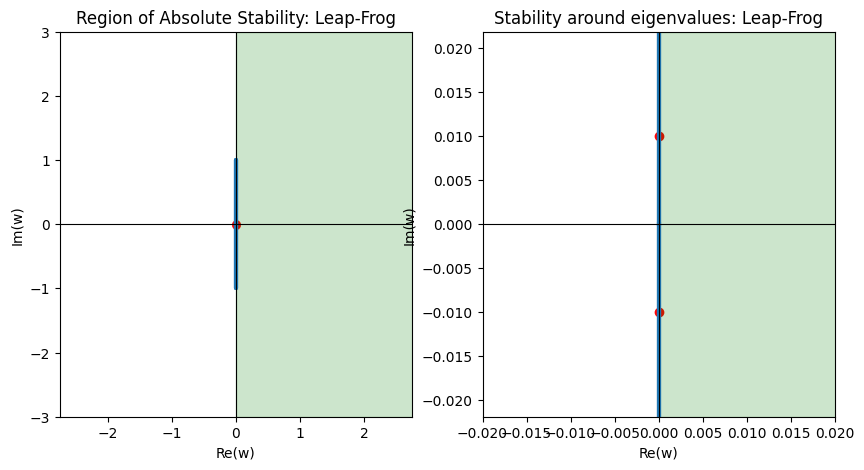

In [13]:
pi = math.pi
Nc = 100

theta = linspace(0, 2*pi, Nc)
r = cos(theta) + 1j * sin(theta)

w = ((r**2)-1)/(2*r)                                  #Carachteristic equation for REVERSE EULER


#-------------------------------------------PLOT-----------------------------------------

x = w.real
y = w.imag


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.axis("equal")
plt.plot(x, y, linewidth=3.0)
plt.scatter(Points_x, Points_y,color="red",marker='o',linewidth=0.2)
plt.xlabel('Re(w)')
plt.ylabel('Im(w)')
plt.xlim(-4, 4)
plt.ylim(-3, 3)


plt.axvspan(   #Stability region (painted the whole background)
    xmin=-0, 
    xmax=5, 
    color='green', 
    alpha=0.2)



plt.axhline(0, color='black', linestyle='-', linewidth=0.8) 
plt.axvline(0, color='black', linestyle='-', linewidth=0.8) 
plt.title('Region of Absolute Stability: Leap-Frog')


plt.subplot(1,2,2)  #-------------------------------------------PLOT2-----------------------------------------
plt.axis("equal")
plt.plot(x, y, linewidth=3.0)
plt.scatter(Points_x, Points_y,color="red",marker='o')
plt.xlabel('Re(w)')
plt.ylabel('Im(w)')
plt.xlim(-2*dt, 2*dt)
plt.ylim(-2*dt, 2*dt)

plt.axvspan(   #Stability region (painted the whole background)
    xmin=-0, 
    xmax=5, 
    color='green', 
    alpha=0.2)


plt.axhline(0, color='black', linestyle='-', linewidth=0.8) 
plt.axvline(0, color='black', linestyle='-', linewidth=0.8) 
plt.title('Stability around eigenvalues: Leap-Frog')


### 2.4. Crank-Nicolson: $\Pi = r - 1 - \frac{w}{2}(1+r)$  -->  $ w = 2 \frac{(r - 1)}{1 + r}$  $\\$  

Text(0.5, 1.0, 'Stability around eigenvalues: Crank-Nicolson')

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


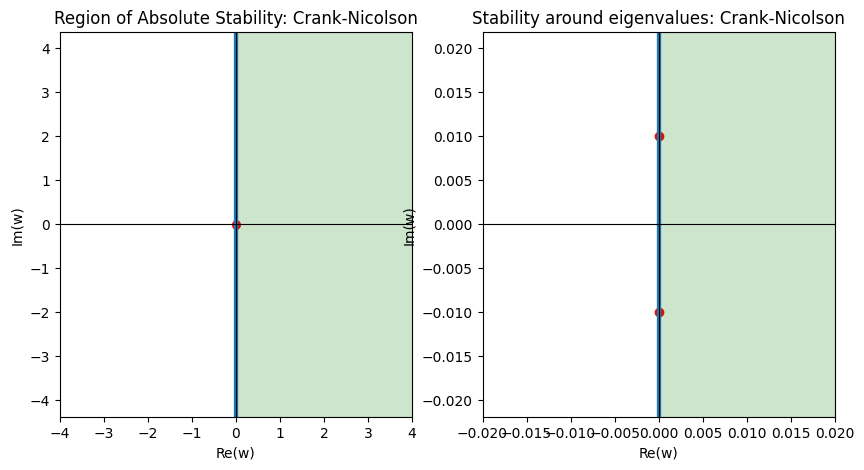

In [14]:
pi = math.pi
Nc = 100

theta = linspace(0, 2*pi, Nc)
r = cos(theta) + 1j * sin(theta)

w = 2* (r - 1)/(1+r)                                    #Carachteristic equation for CRANK-NICOLSON

#-------------------------------------------PLOT-----------------------------------------

x = w.real
y = w.imag


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.axis("equal")
plt.plot(x, y, linewidth=3.0)
plt.scatter(Points_x, Points_y,color="red",marker='o',linewidth=0.2)
plt.xlabel('Re(w)')
plt.ylabel('Im(w)')
plt.xlim(-4, 4)
plt.ylim(-3, 3)


plt.axvspan(   #Stability region (painted the whole background)
    xmin=-0, 
    xmax=5, 
    color='green', 
    alpha=0.2)



plt.axhline(0, color='black', linestyle='-', linewidth=0.8) 
plt.axvline(0, color='black', linestyle='-', linewidth=0.8) 
plt.title('Region of Absolute Stability: Crank-Nicolson')


plt.subplot(1,2,2)  #-------------------------------------------PLOT2-----------------------------------------
plt.axis("equal")
plt.plot(x, y, linewidth=3.0)
plt.scatter(Points_x, Points_y,color="red",marker='o')
plt.xlabel('Re(w)')
plt.ylabel('Im(w)')
plt.xlim(-2*dt, 2*dt)
plt.ylim(-2*dt, 2*dt)

plt.axvspan(   #Stability region (painted the whole background)
    xmin=-0, 
    xmax=5, 
    color='green', 
    alpha=0.2)


plt.axhline(0, color='black', linestyle='-', linewidth=0.8) 
plt.axvline(0, color='black', linestyle='-', linewidth=0.8) 
plt.title('Stability around eigenvalues: Crank-Nicolson')


### 2.5. Range-Kutta 4: $ r = 1 + w + \frac{(w^2)}{2!}  + \frac{(w^3)}{3!}  + \frac{(w^4)}{4!} $  $\\$ 

Text(0.5, 1.0, 'Stability around eigenvalues: Range Kutta 4')

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


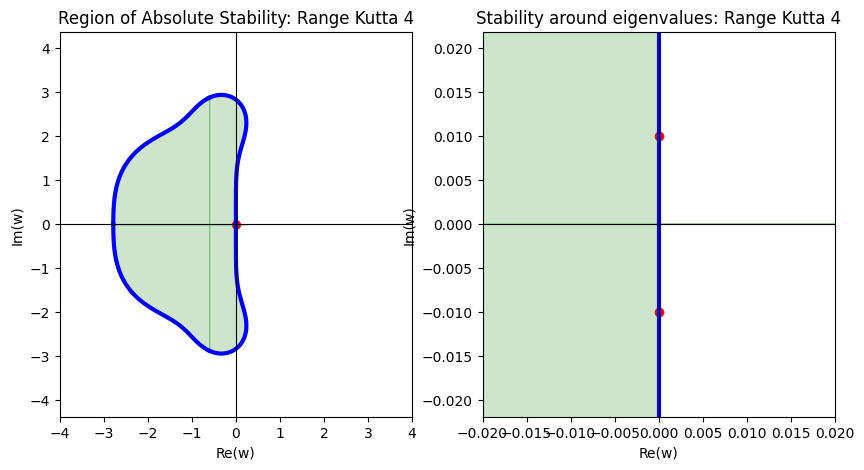

In [15]:
pi = math.pi
Nc = 100

theta = linspace(0, 2*pi, Nc)
r = cos(theta) + 1j * sin(theta)


z = 1
z2 = -10
   
def RK4_pi_equation(z,r):
    def F2(z):
        a = 1 + z + (z**2)/2 + (z**3)/6 + (z**4)/24 
        return r - a
    return Simple_Math.Newton_escalar(F2,z)


w = zeros(Nc,dtype=complex)
w2 = zeros(Nc,dtype=complex)
for j in range(Nc):
    r_val = r[j]
    w[j] = RK4_pi_equation(z,r_val)
    z = w[j]
    w2[j] = RK4_pi_equation(z2,r_val)
    z2 = w2[j]


#-------------------------------------------PLOT-----------------------------------------


x1 = w.real
y1 = w.imag
x2 = w2.real
y2 = w2.imag

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.axis("equal")
plt.plot(x1, y1, linewidth=3.0, color="blue")
plt.plot(x2, y2, linewidth=3.0, color="blue")
plt.plot(x1, -y1, linewidth=3.0, color="blue")
plt.plot(x2, -y2, linewidth=3.0, color="blue")
plt.scatter(Points_x, Points_y,color="red",marker='o',linewidth=0.2)
plt.xlabel('Re(w)')
plt.ylabel('Im(w)')
plt.xlim(-4, 4)
plt.ylim(-3, 3)

plt.fill_between(x1, y1, where=(x2 >= -5) & (x2 <= 1), color='green', alpha=0.2)   #Coloring of the stablity region
plt.fill_between(x1, -y1, where=(x2 >= -5) & (x2 <= 1), color='green', alpha=0.2)
plt.fill_between(x2, y2, where=(x2 >= -5) & (x2 <= 1), color='green', alpha=0.2)
plt.fill_between(x2, -y2, where=(x2 >= -5) & (x2 <= 1), color='green', alpha=0.2)


plt.axhline(0, color='black', linestyle='-', linewidth=0.8) 
plt.axvline(0, color='black', linestyle='-', linewidth=0.8) 
plt.title('Region of Absolute Stability: Range Kutta 4')


plt.subplot(1,2,2)       #-------------------------------------------PLOT2-----------------------------------------
plt.axis("equal")
plt.plot(x1, y1, linewidth=3.0, color="blue")
plt.plot(x2, y2, linewidth=3.0, color="blue")
plt.plot(x1, -y1, linewidth=3.0, color="blue")
plt.plot(x2, -y2, linewidth=3.0, color="blue")
plt.scatter(Points_x, Points_y,color="red",marker='o')
plt.xlabel('Re(w)')
plt.ylabel('Im(w)')
plt.xlim(-2*dt, 2*dt)
plt.ylim(-2*dt, 2*dt)

plt.fill_between(x1, y1, where=(x2 >= -5) & (x2 <= 1), color='green', alpha=0.2)   #Coloring of the stablity region
plt.fill_between(x1, -y1, where=(x2 >= -5) & (x2 <= 1), color='green', alpha=0.2)
plt.fill_between(x2, y2, where=(x2 >= -5) & (x2 <= 1), color='green', alpha=0.2)
plt.fill_between(x2, -y2, where=(x2 >= -5) & (x2 <= 1), color='green', alpha=0.2)


plt.axhline(0, color='black', linestyle='-', linewidth=0.8) 
plt.axvline(0, color='black', linestyle='-', linewidth=0.8) 
plt.title('Stability around eigenvalues: Range Kutta 4')



# 3. Explain the numerical results based on regions of absolute stability.

### Observing the results obtained for the different schemes, where the green area is the stability region, we can easily see the behaviour and stability of the problem. If we represent each value of $\lambda \Delta t$ on the region of Absolute Stability of each scheme, we can analyze if the stability of the problem is well-defined on each scheme:
1. if $|r| < 1$, $|\Delta t \lambda |$ should be inside the green area
1. if $|r | = 1$, $|\Delta t \lambda |$ should ON the border of the green area
1. if $|r| > 1$, $|\Delta t \lambda |$ should be outside the green area

### If we analyze each scheme separately: $\\$
### 1. For Euler, both values of $|\lambda \Delta t|$ will always be outside of the stability region. As these eigenvalues have a module of 1, they should tend to a constant value over the time, but with an Euler scheme they tend to +inf. For this reason, the orbits obtained with this scheme always open up with time. $\\$
### 2. For Reverse Euler, both values of $|\lambda \Delta t|$ will always be inside of the stability region. As these eigenvalues have a module of 1, they should tend to a constant value over the time, but with an Reverse Euler scheme they tend to 0. For this reason, the orbits obtained with this scheme always start to move to the origin. $\\$
### 3. For Crank-Nicolson, both values of $|\lambda \Delta t|$ will always be ON THE CONTOUR of the stability region. As these eigenvalues have a module of 1, they should tend to a constant value over the time, and with this scheme they do, so the numerical integration with this scheme is correct, as it can be seen on the orbits. $\\$
### 3. For Range-Kutta 4, both values of $|\lambda \Delta t|$ are ON THE CONTOUR of the stability region ONLY for small values. If the values of   $ \Delta t$  are small enough, the resultd for this numerical scheme are correct $\\$
    